In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
dataset=pd.read_csv("loan-train.csv")

In [67]:
dataset.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [68]:
dataset.shape

(614, 13)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [70]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [71]:
pd.crosstab(dataset["Credit_History"],dataset["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: xlabel='ApplicantIncome'>

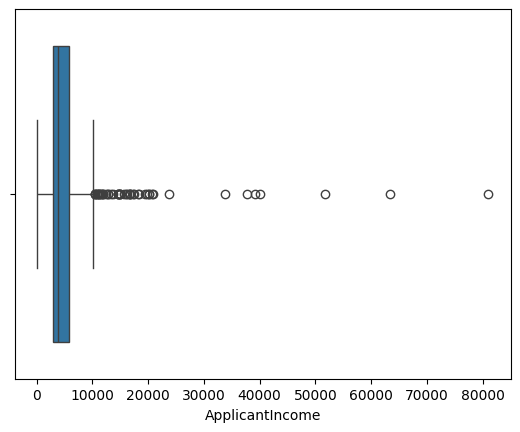

In [72]:
sns.boxplot(x=dataset["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

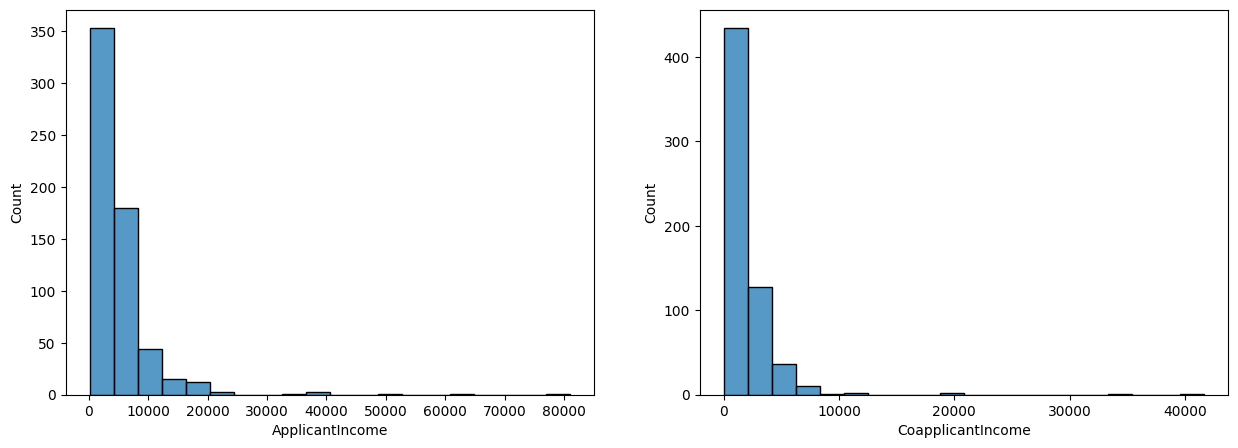

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=dataset["ApplicantIncome"],bins=20)
plt.subplot(1,2,2)
sns.histplot(x=dataset["CoapplicantIncome"],bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

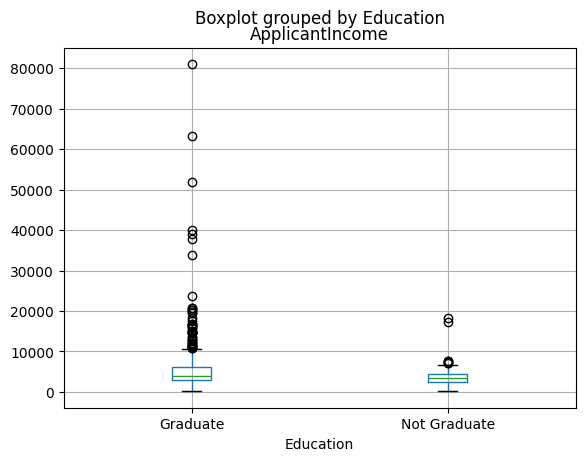

In [74]:
dataset.boxplot(column="ApplicantIncome",by="Education")

<Axes: xlabel='LoanAmount', ylabel='Count'>

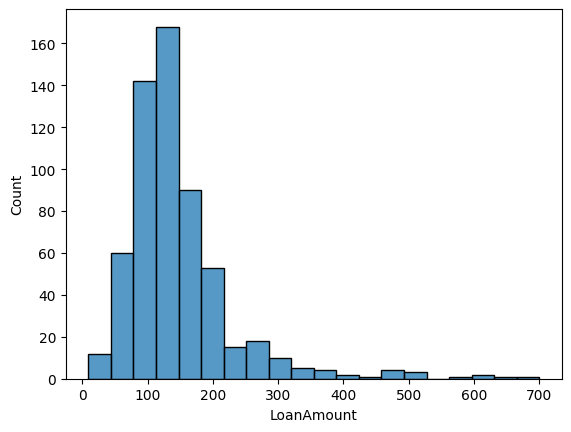

In [75]:
sns.histplot(data=dataset["LoanAmount"],bins=20)

<Axes: >

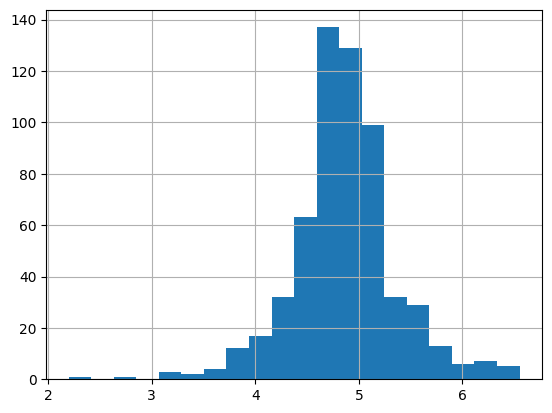

In [76]:
dataset["LoanAmount_log"]=np.log(dataset["LoanAmount"])
dataset["LoanAmount_log"].hist(bins=20)

In [77]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [78]:
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
LoanAmount_log       3.583062
dtype: float64

In [79]:
dataset.select_dtypes(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [80]:
# Calculate the mode value for each column
mode_gender = dataset["Gender"].mode()[0]
mode_married = dataset["Married"].mode()[0]
mode_dependents = dataset["Dependents"].mode()[0]
mode_self_employed = dataset["Self_Employed"].mode()[0]
mode_loan_amount_term = dataset["Loan_Amount_Term"].mode()[0]
mode_credit_history = dataset["Credit_History"].mode()[0]

# Fill missing values using the mode
dataset["Gender"] = dataset["Gender"].fillna(mode_gender)
dataset["Married"] = dataset["Married"].fillna(mode_married)
dataset["Dependents"] = dataset["Dependents"].fillna(mode_dependents)
dataset["Self_Employed"] = dataset["Self_Employed"].fillna(mode_self_employed)
dataset["Loan_Amount_Term"] = dataset["Loan_Amount_Term"].fillna(mode_loan_amount_term)
dataset["Credit_History"] = dataset["Credit_History"].fillna(mode_credit_history)


In [103]:
# Calculate the mean value for each column
mean_loan_amount = dataset["LoanAmount"].mean()
mean_loan_amount_log = dataset["LoanAmount_log"].mean()

# Fill missing values using the mean
dataset["LoanAmount"] = dataset["LoanAmount"].fillna(mean_loan_amount)
dataset["LoanAmount_log"] = dataset["LoanAmount_log"].fillna(mean_loan_amount_log)

In [104]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

#### Normalize

In [106]:
dataset["TotalIncome"]=dataset["ApplicantIncome"]+dataset["CoapplicantIncome"]
dataset["TotalIncome"]=np.log(dataset["TotalIncome"])

<Axes: >

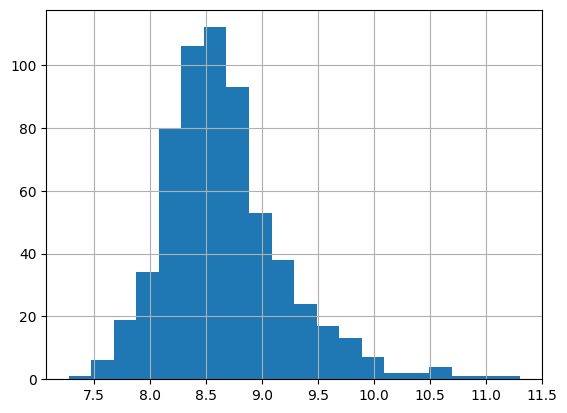

In [107]:
dataset["TotalIncome"].hist(bins=20)

In [108]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368


In [113]:
# independent 
x=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
# dependent
y=dataset.iloc[:,12].values

In [115]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352,
        8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425,
        8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587,
        8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [121]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 8.675563527387679]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 9.328123407632566]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 8.644882552557126]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 9.0280988119824]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 8.704999678440762]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 8.777401286867264]]


In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
Le_x=LabelEncoder()

In [137]:
for i in range (0,5):
    x_train[:,i]=Le_x.fit_transform(x_train[:,i])

In [138]:
x_train[:,7]=Le_x.fit_transform(x_train[:,7])

In [139]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [140]:
Le_y=LabelEncoder()
y_train=Le_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [141]:
for i in range (0,5):
    x_test[:,i]=Le_x.fit_transform(x_test[:,i])

In [142]:
x_test[:,7]=Le_x.fit_transform(x_test[:,7])

In [143]:
y_test=Le_y.fit_transform(y_test)

In [144]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [156]:
y_pred=dtc.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [157]:
dtc.score(x_test,y_test)

0.7073170731707317

In [154]:
from sklearn import metrics
print("The Accuracy od decision tree is: ",metrics.accuracy_score(y_pred,y_test))

The Accuracy od decision tree is:  0.7073170731707317


In [159]:
from sklearn.naive_bayes import GaussianNB

In [160]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [161]:
gnb.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [162]:
gnb.score(x_test,y_test)

0.8292682926829268

In [163]:
testData=pd.read_csv("loan-test.csv")
testData.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [164]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [165]:
testData.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [170]:
# Calculate the mode value for each column
mode_gender = testData["Gender"].mode()[0]
mode_married = testData["Married"].mode()[0]
mode_dependents = testData["Dependents"].mode()[0]
mode_self_employed = testData["Self_Employed"].mode()[0]
mode_loan_amount_term = testData["Loan_Amount_Term"].mode()[0]
mode_credit_history = testData["Credit_History"].mode()[0]

# Fill missing values using the mode
testData["Gender"] = testData["Gender"].fillna(mode_gender)
testData["Married"].fillna(mode_married)
testData["Dependents"] = testData["Dependents"].fillna(mode_dependents)
testData["Self_Employed"] = testData["Self_Employed"].fillna(mode_self_employed)
testData["Loan_Amount_Term"] = testData["Loan_Amount_Term"].fillna(mode_loan_amount_term)
testData["Credit_History"] = testData["Credit_History"].fillna(mode_credit_history)


In [171]:
# Calculate the mean value for each column
mean_loan_amount = testData["LoanAmount"].mean()

# Fill missing values using the mean
testData["LoanAmount"] = testData["LoanAmount"].fillna(mean_loan_amount)

In [172]:
testData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

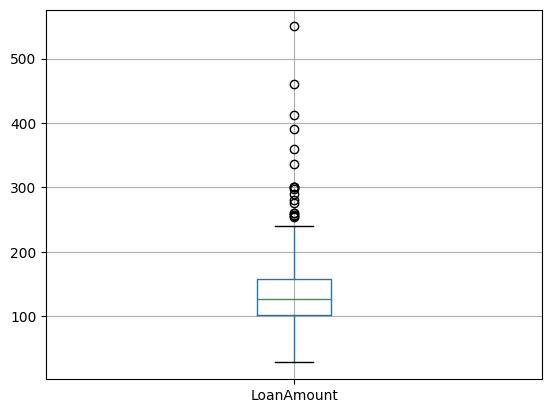

In [173]:
testData.boxplot(column="LoanAmount")

<Axes: >

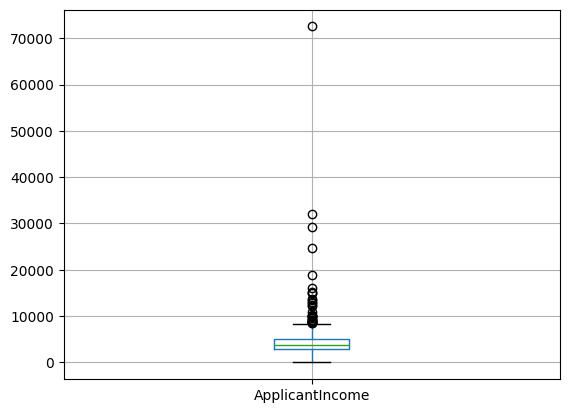

In [174]:
testData.boxplot(column="ApplicantIncome")

In [175]:
testData["LoanAmount_log"]=np.log(testData["LoanAmount"])

In [200]:
testData["TotalIncome"]=testData["ApplicantIncome"]+testData["CoapplicantIncome"]
testData["TotalIncome_log"]=np.log(testData["TotalIncome"])

<Axes: >

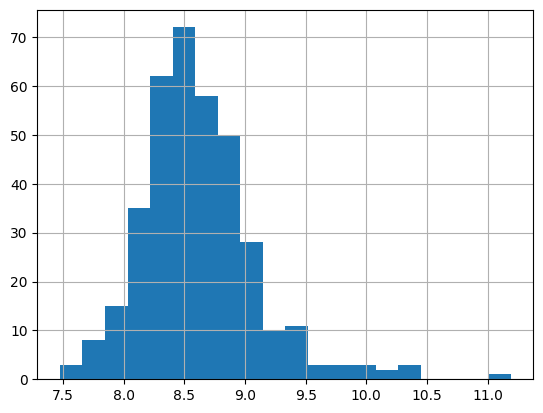

In [201]:
testData["TotalIncome_log"].hist(bins=20)

In [202]:
testData.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678


In [203]:
test=testData.iloc[:,np.r_[1:5,9:11,13:15]].values

In [204]:
for i in range (0,5):
    test[:,i]=Le_x.fit_transform(test[:,i])

In [205]:
test[:,7]=Le_x.fit_transform(test[:,7])

In [206]:
test=ss.fit_transform(test)

In [207]:
pred=dtc.predict(test)
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,